
### Logistic Regression outline.

**You want to assigna a probability for every x with logistic function.**                   
**You dont know the parmaters of the logistic function alpha and beta.**                
**The outcomes are either 0 or 1, so you want to use the probability as parameter of a berbnoulli distribution.**              
**Generate y_hat from the bernoulli distribution fits on the real y.**                      
**The best fitting gives you parameters of the logistic function.**              
**Which you can use to predict with uncentainty.**                          

In [23]:
import seaborn as sns
from IPython.core.pylabtools import figsize
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pymc3 as pm
import arviz as az
sns.set()

In [6]:
iris = sns.load_dataset('iris')

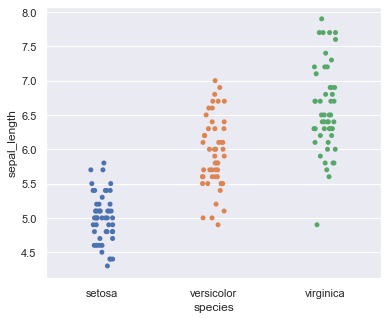

In [7]:
figsize(6,5)
sns.stripplot(x = 'species', y = 'sepal_length', data = iris, jitter = True)
plt.show()

In [10]:
df = iris.query("species == ('setosa', 'versicolor')")
y_0 = pd.Categorical(df['species']).codes
x_n = 'sepal_length'
x_0 = df[x_n].values

$logistic(z) = 1 / (1 + e^{-z})$

In [41]:
with pm.Model() as model:
    
    # set parameter for linear part of the model
    alpha = pm.Normal('alpha',mu  = 0,sigma = 10)
    beta = pm.Normal('beta', mu = 0, sigma = 10)
    
    mu = alpha +  pm.math.dot(x_0, beta)
    theta = pm.Deterministic('theta', 1 / (1 +  pm.math.exp(-mu)))
    bd = pm.Deterministic('bd', -alpha / beta)
    y_pred = pm.Bernoulli('y_pred',theta, observed = y_0)

In [42]:
with model:
    start = pm.find_MAP()
    step = pm.NUTS()
    trace = pm.sample(10000,start = start,step = step, return_inferencedata=True)

Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta, alpha]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 50 seconds.
The acceptance probability does not match the target. It is 0.8843707884079196, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.


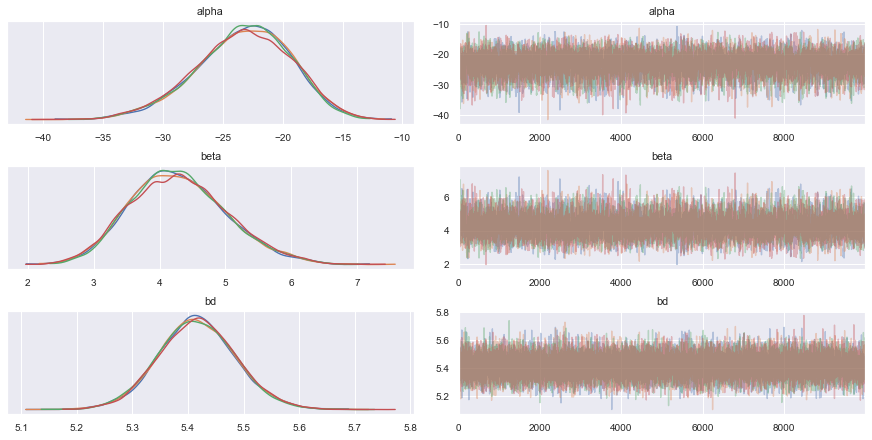

In [43]:
az.plot_trace(trace,var_names = ['alpha','beta','bd'])
plt.show()

In [44]:
az.summary(trace,var_names = ['alpha','beta','bd'])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
alpha,-23.267,3.984,-30.965,-16.099,0.054,0.039,5355.0,5308.0,5366.0,6262.0,1.0
beta,4.297,0.739,2.936,5.695,0.010,0.007,5384.0,5338.0,5396.0,6226.0,1.0
bd,5.416,0.070,5.288,5.553,0.000,0.000,29609.0,29553.0,29589.0,28682.0,1.0


In [47]:
df = iris.query("species == ('setosa', 'versicolor')")
y_1 = pd.Categorical(df['species']).codes
x_n = ['sepal_length', 'sepal_width']
x_1 = df[x_n].values

In [48]:
with pm.Model() as model1:
    # set parameter of the linear part (vectorized)
    alpha = pm.Normal('alpha',mu  = 0,sigma = 10)
    beta = pm.Normal('beta', mu = 0, sigma = 10, shape = len(x_n))
    
    mu = alpha +  pm.math.dot(x_1, beta)
    theta = pm.Deterministic('theta', 1 / (1 +  pm.math.exp(-mu)))
    y_pred = pm.Bernoulli('y_pred',theta, observed = y_1)

In [49]:
with model1:
    start = pm.find_MAP()
    step = pm.NUTS()
    trace = pm.sample(10000,start = start,step = step, return_inferencedata=True)

Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta, alpha]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 65 seconds.
There were 249 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.8802483292947869, but should be close to 0.8. Try to increase the number of tuning steps.
There were 437 divergences after tuning. Increase `target_accept` or reparameterize.
There were 2651 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6669023489038125, but should be close to 0.8. Try to increase the number of tuning steps.
There were 1392 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 10% for some parameters.


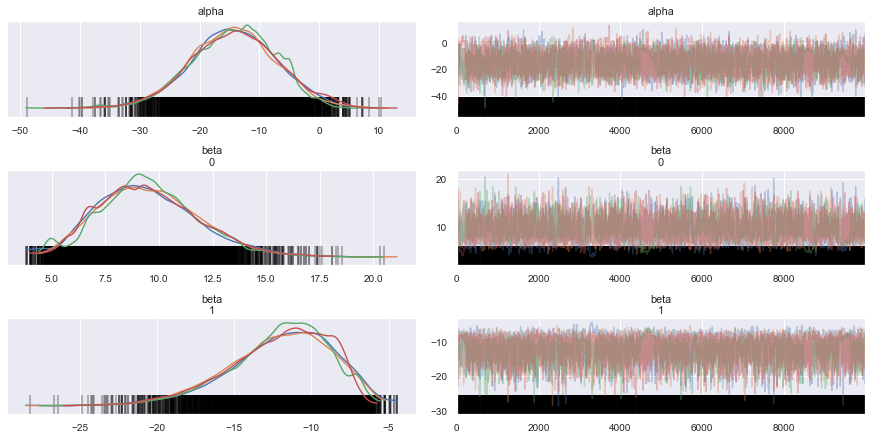

In [50]:
az.plot_trace(trace,var_names = ['alpha','beta'])
plt.show()

In [51]:
az.summary(trace,var_names = ['alpha','beta'])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
alpha,-14.279,7.262,-28.488,-1.133,0.135,0.095,2896.0,2896.0,2846.0,2490.0,1.0
beta[0],9.528,2.360,5.309,14.074,0.067,0.047,1259.0,1259.0,1025.0,482.0,1.0
beta[1],-12.031,3.335,-18.251,-6.354,0.082,0.058,1670.0,1670.0,1223.0,581.0,1.0


# The Logistic Function

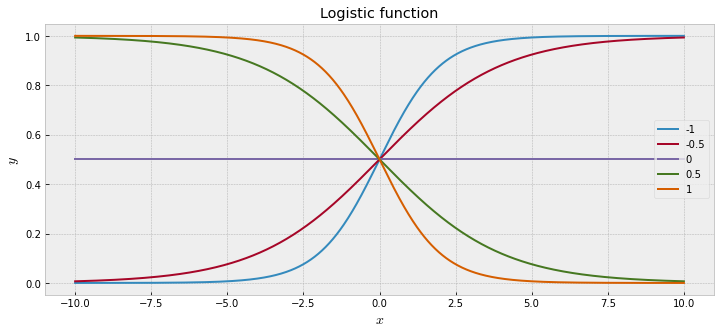

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
plt.style.use('bmh')

def logistic(x, beta, alpha = 0):
    return 1 / (1 + np.exp(beta * x + alpha))

figsize(12,5)
x = np.linspace(-10,10,1000)
for beta in [-1, -0.5, 0, 0.5, 1]:
    y = logistic(x, beta)
    plt.plot(x,y, label = beta)
plt.legend(loc = 'right')
plt.title('Logistic function')
plt.xlabel('$x$', fontsize =14)
plt.ylabel('$y$', fontsize = 14)
plt.show()

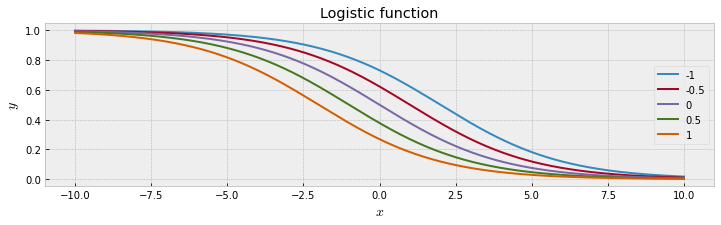

In [80]:
for alpha in [-1, -0.5, 0, 0.5, 1]:
    y = logistic(x, 0.5, alpha)
    plt.plot(x,y, label = alpha)
plt.legend(loc = 'right')
plt.title('Logistic function')
plt.xlabel('$x$', fontsize =14)
plt.ylabel('$y$', fontsize = 14)
plt.show()

*Choice of proability Modelling*

Lower values got high probability when beta > 0               
Higher values got high probability when beta < 0

**Alpha shift the function**             
**Beta reshape the function**

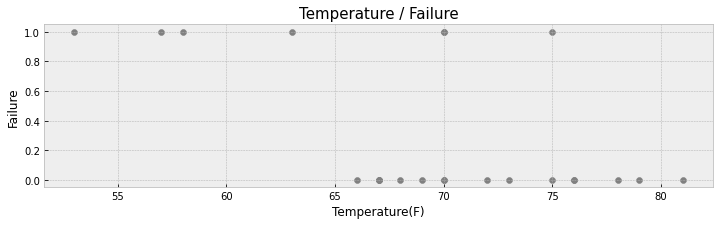

In [79]:
data = np.array(
[[ 66.,   0.],
 [ 70.,   1.],
 [ 69.,   0.],
 [ 68.,   0.],
 [ 67.,   0.],
 [ 72.,   0.],
 [ 73.,   0.],
 [ 70.,   0.],
 [ 57.,   1.],
 [ 63.,   1.],
 [ 70.,   1.],
 [ 78.,   0.],
 [ 67.,   0.],
 [ 53.,   1.],
 [ 67.,   0.],
 [ 75.,   0.],
 [ 70.,   0.],
 [ 81.,   0.],
 [ 76.,   0.],
 [ 79.,   0.],
 [ 75.,   1.],
 [ 76.,   0.],
 [ 58.,   1.]])

figsize(12,3)
plt.scatter(data[:,0],data[:,1], color = 'gray')
plt.xlabel('Temperature(F)')
plt.ylabel('Failure')
plt.title('Temperature / Failure', fontsize = 15)
plt.show()

In [82]:
import pymc3 as pm

In [85]:
temperatures = data[:,0]
failure = data[:,1]

In [91]:
with pm.Model() as mode:
    beta = pm.Normal('beta', mu =0, sigma = 100)
    alpha = pm.Normal('alpha', mu = 0, sigma = 100)
    p = pm.Deterministic('p',1 / (1 + pm.math.exp(alpha + beta * temperatures)))
    
    obs = pm.Bernoulli('obs', p, observed = failure)
    trace = pm.sample(100000,return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta]


Sampling 4 chains for 1_000 tune and 41_295 draw iterations (4_000 + 165_180 draws total) took 130 seconds.
The number of effective samples is smaller than 10% for some parameters.


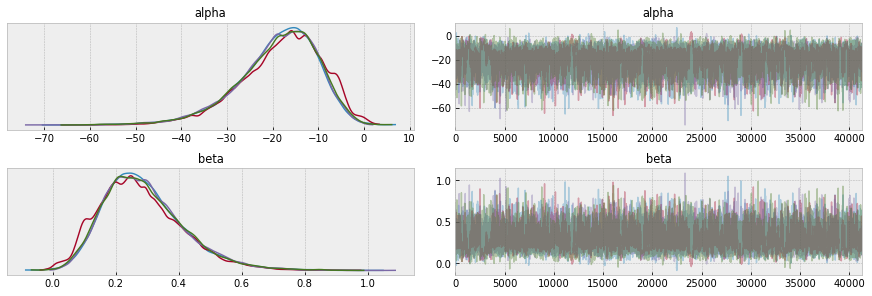

In [93]:
import arviz as az
az.plot_trace(trace,var_names = ['alpha','beta'])
plt.show()

In [94]:
az.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
beta,0.286,0.130,0.061,0.530,0.002,0.001,3761.0,3761.0,3002.0,2711.0,1.0
alpha,-18.675,8.831,-35.515,-3.633,0.144,0.102,3741.0,3741.0,2991.0,2690.0,1.0
p[0],0.449,0.144,0.185,0.718,0.001,0.001,20114.0,20114.0,20569.0,57328.0,1.0
p[1],0.221,0.101,0.044,0.404,0.001,0.000,30842.0,30842.0,29004.0,62356.0,1.0
p[2],0.269,0.109,0.072,0.468,0.000,0.000,80536.0,80536.0,75381.0,85259.0,1.0
p[3],0.323,0.119,0.107,0.544,0.000,0.000,105453.0,103709.0,106098.0,99628.0,1.0
p[4],0.384,0.131,0.148,0.632,0.001,0.000,57180.0,52789.0,59878.0,77626.0,1.0
p[5],0.149,0.088,0.010,0.307,0.001,0.001,8698.0,8698.0,9168.0,25334.0,1.0
p[6],0.122,0.082,0.004,0.271,0.001,0.001,6310.0,6310.0,6949.0,15986.0,1.0
p[7],0.221,0.101,0.044,0.404,0.001,0.000,30842.0,30842.0,29004.0,62356.0,1.0


In [103]:
def logistic(x, beta, alpha = 0):
    return 1 / (1 + np.exp(beta * x + alpha))

In [104]:
# alphas = trace.posterior['alpha'].values.reshape(-1)
# betas = trace.posterior['beta'].values.reshape(-1)

# logistic(np.arange(-80,80),betas, alphas)